In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [2]:
path = "tetris_blocks.png"

# Image input and initial processing
Load the input image (whose path was supplied via command line argument) and display the image to our screen:

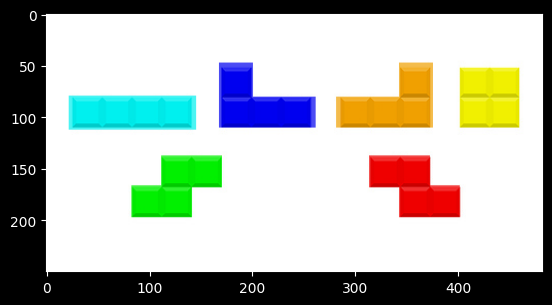

In [3]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale:

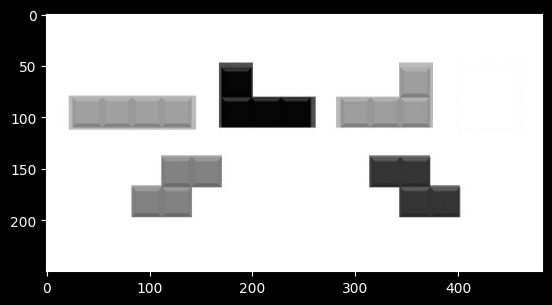

In [28]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

# Advanced processing
Apply edge detection, so we can find the outlines of objects in images:


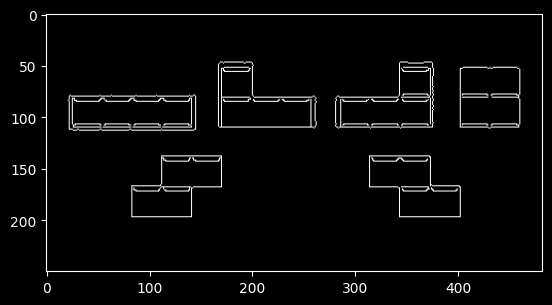

In [5]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values equal to or less than 225 to 255 (white; foreground): $x \le 225 \rightarrow x = 255$ and all pixel values greater than 225 to 0 (black; background): $x \gt 225 \rightarrow x=0$

Thereby we are segmenting the image.

Both the threshold (e.g. 225 in our case) and the value for pixels less than the threshold in the resulting image (255 in our case) can be tweaked.

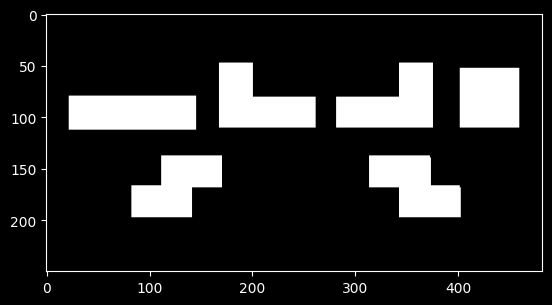

In [6]:
threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image:

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours:

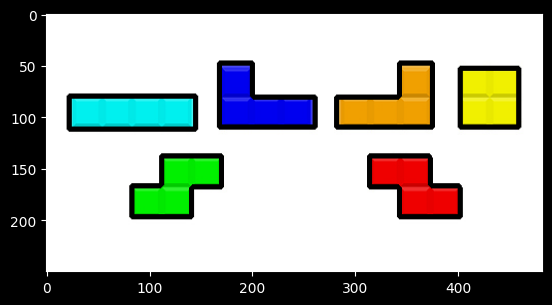

In [8]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)

plt.imshow(output)

Draw the total number of contours found in purple:

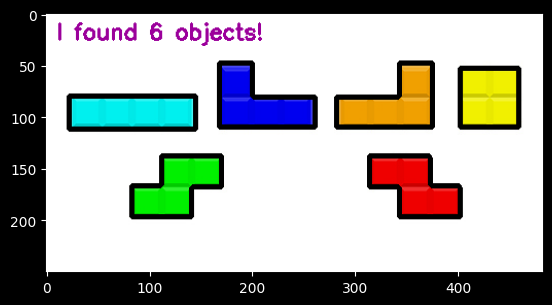

In [9]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects:

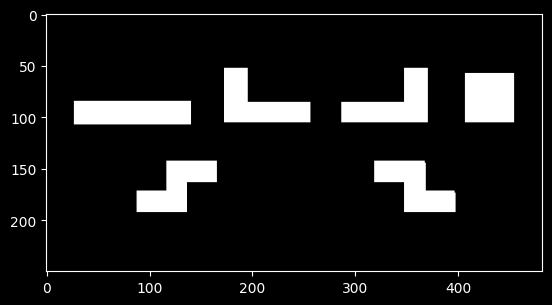

In [10]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects:

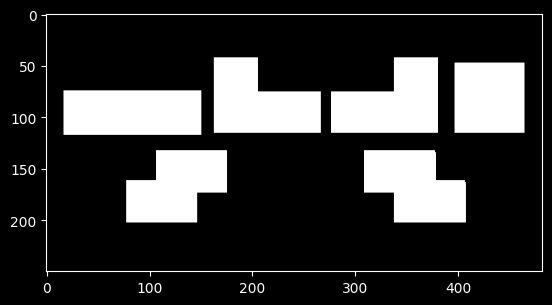

In [11]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise `AND` to our input image, keeping only the masked regions:

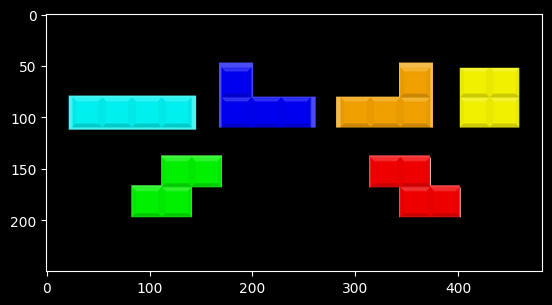

In [12]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Exercise 2
1. Can you remove the yellow square from the image?
2. Go through the tutoria, but with the `spheres.png` image. (replace `tetris_blocks.png` with `spheres.png`)
3. Tweak the parameters of the thresholding. Can you threshold all the spheres?
4. Can you remove the red sphere?
5. Can you remove the green sphere?

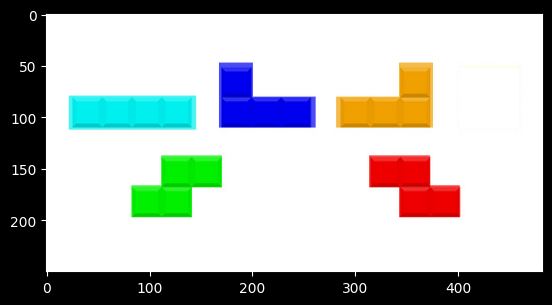

In [13]:
# Opgave 1
plt.imshow(image)
image_no_yellow = image
# Find the contour corresponding to the yellow object and fill it with white
# Assume the yellow object is the one with the largest area (or you can manually select by index)
yellow_idx = 3
cv2.drawContours(image_no_yellow, [cnts[yellow_idx]], -1, (255, 255, 255), -1)
plt.imshow(image_no_yellow)

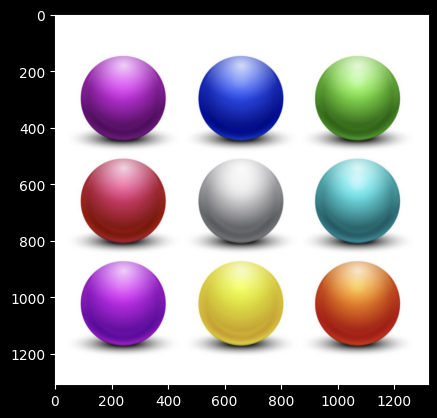

In [14]:
# Opgave 2
img = cv2.imread("spheres.jpg")
b,g,r = cv2.split(img)       # get b,g,r
img = cv2.merge([r,g,b])
plt.imshow(img)

img_eroded = cv2.erode(img, None, iterations=1)
plt.imshow(img_eroded)
img = img_eroded

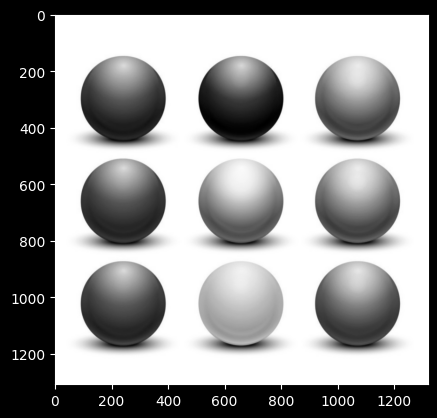

In [15]:
# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap = 'gray')

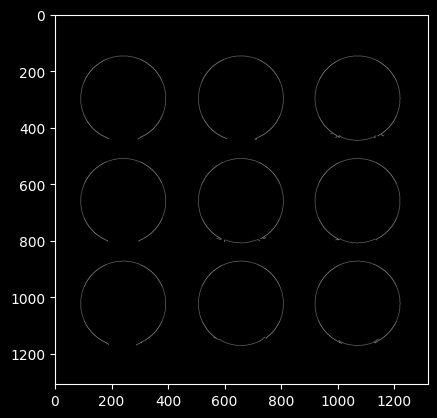

In [16]:
# Apply edge detection to find the outlines of objects
img_edges = cv2.Canny(img_gray, 30, 150)
plt.imshow(img_edges, cmap='gray')

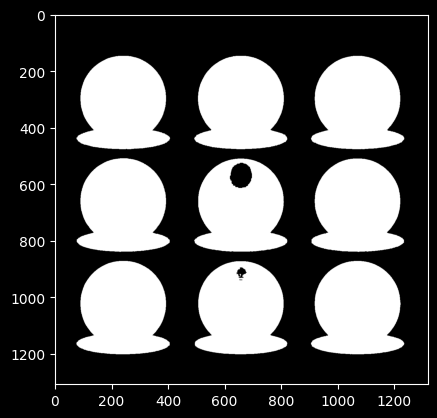

In [17]:
# Threshold the image
threshold = 240
threshold_value = 255

img_thresh = cv2.threshold(img_gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(img_thresh, cmap='gray')


In [18]:
# Find contours (ie. outlines)
img_cnts = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_cnts = imutils.grab_contours(img_cnts)
img_output = img.copy()

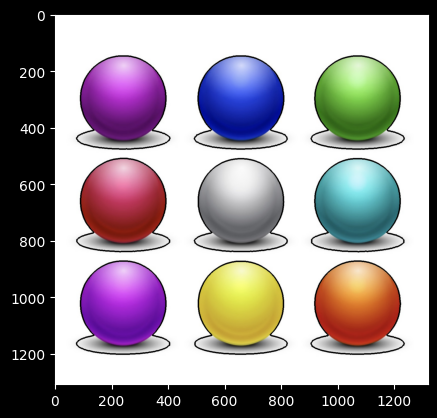

In [19]:
# Loop over the contours
for c in img_cnts:
    cv2.drawContours(img_output, [c], -1, (0,0,0), 3)

plt.imshow(img_output)

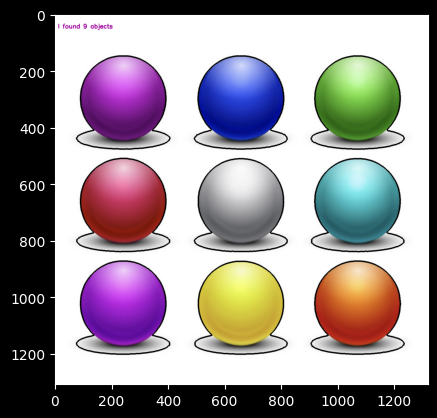

In [20]:
# Draw the total number of contours found in purple
message = f"I found {format(len(img_cnts))} objects"
cv2.putText(img_output, message, (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(img_output)

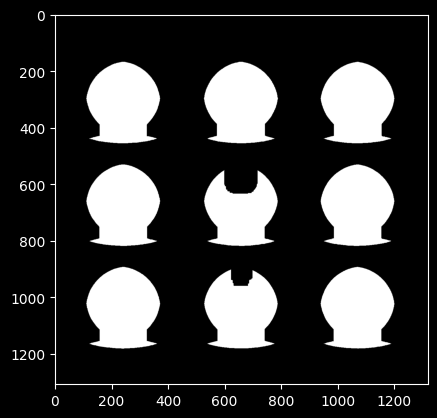

In [21]:
# Apply erosions to reduce the size of foreground objects
img_mask = img_thresh.copy()
img_mask = cv2.erode(img_mask, None, iterations = 20)
plt.imshow(img_mask, cmap = 'gray')

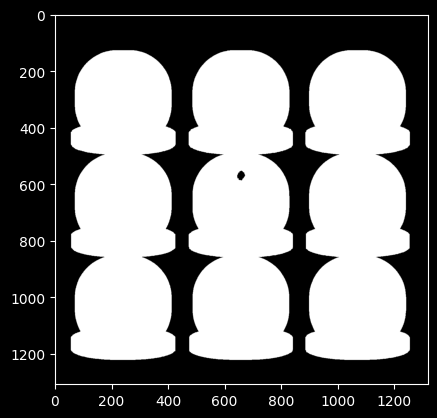

In [22]:
# Delations can increase the size
img_mask = img_thresh.copy()
img_mask = cv2.dilate(img_mask, None, iterations = 20)
plt.imshow(img_mask, cmap = 'gray')

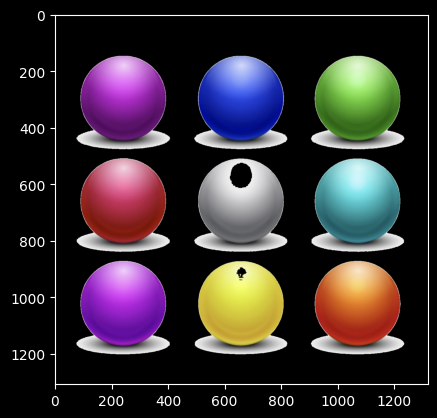

In [23]:
img_mask = img_thresh.copy()
output = cv2.bitwise_and(img, img, mask=img_mask)
plt.imshow(output)

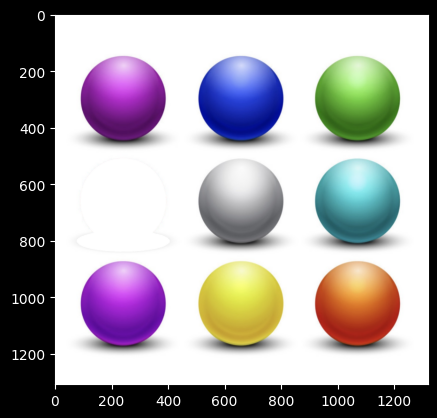

In [24]:
# Remove the red object by filling its contour with white
plt.imshow(img)
red_index = 5
image_no_red = img.copy()
cv2.drawContours(image_no_red, [img_cnts[red_index]], -1, (255, 255, 255), -1)
plt.imshow(image_no_red)

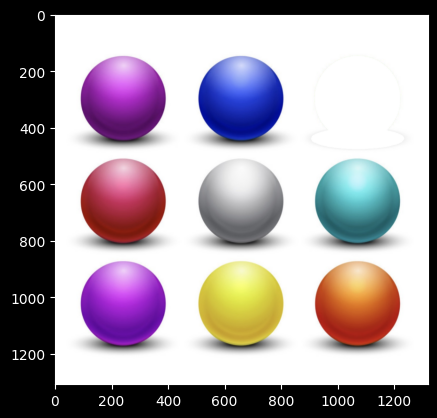

In [25]:
# Remove the green sphere

plt.imshow(img)
red_index = 6
image_no_red = img.copy()
cv2.drawContours(image_no_red, [img_cnts[red_index]], -1, (255, 255, 255), -1)
plt.imshow(image_no_red)